<a href="https://colab.research.google.com/github/Nithikorn-Lert/Machine-Learning-project/blob/master/Python_Business_Interpretation_using_Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: Chapman, Christopher N., McDonnell Feit, Elea - R for Marketing Research and Analytics

This notebook was created for self-learning of Business statistics. The main GOAL is to be able to understand and interpret the result from business point of view.
In addition, Since I'm learning a japannese language. So, japannese language will also be provided. I would like to greatly appreciate the great effort of Chris Chapman and other authors.

このノートブックはビジネス視点で統計を自習するために、作られました。　目的には結果をビジネス的に解ることができて、その点で解釈できます。色々なことを参考になりましたので、著者たちに感謝します。

In [0]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

scaler = preprocessing.StandardScaler()

In [0]:
df = pd.read_csv("http://goo.gl/IQl8nc")

In [0]:
df.describe()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.488000,4.417000,6.195000,6.06800,4.323000,4.259000,4.33700,5.220000,3.727000
std,3.203454,2.608432,3.078059,2.74425,2.778199,2.667027,2.39858,2.742101,2.544592
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,4.00000,2.000000,2.000000,2.00000,3.000000,1.000000
50%,4.000000,4.000000,7.000000,6.00000,4.000000,4.000000,4.00000,5.000000,3.000000
75%,7.000000,6.000000,9.000000,8.00000,6.000000,6.000000,6.00000,7.000000,5.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000


In [0]:
df_content = df.loc[:,["perform", "leader", "latest", "fun", "serious",	"bargain",	"value", "trendy",	"rebuy"]]
names = df_content.columns

In [0]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_content)

scaled_df = pd.DataFrame(scaled_df, columns=names)

In [0]:
scaled_df["brand"] = df.brand
scaled_df.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,-0.77705,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714,a
1,-1.08937,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034,a
2,-0.77705,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714,a
3,-1.08937,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221,a
4,-1.08937,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221,a


In [0]:
df_Gby_brand = scaled_df.groupby('brand').mean()
df_Gby_brand

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,-0.886362,-0.528168,0.411179,0.656974,-0.919400,0.214203,0.184785,-0.525407,-0.596465
b,0.931336,1.071294,0.726470,-0.972701,1.183733,0.041640,0.151415,0.740679,0.237092
c,0.650249,1.163350,-0.102388,-0.845098,1.223346,-0.607347,-0.440898,0.025541,-0.132504
d,-0.680231,-0.593373,0.352671,0.186665,-0.692521,-0.881197,-0.933102,0.737030,-0.494236
e,-0.564673,0.192933,0.456685,0.296039,0.042135,0.551826,0.418373,0.138649,0.036566
f,-0.058716,0.269645,-1.262790,-0.218019,0.589525,0.874444,1.023200,-0.813652,1.357675
g,0.918843,-0.167617,-1.285543,-0.516975,-0.534066,0.896953,1.256789,-1.277032,1.361607
h,-0.014991,-0.298029,0.502191,0.715307,-0.141529,-0.738645,-0.782938,0.864733,-0.604328
i,0.334806,-0.321043,0.355922,0.412705,-0.148732,-0.254718,-0.803794,0.591083,-0.203278


In [0]:
df_Gby_brand_sc = scale(df_Gby_brand)
df_Gby_brand_sc

array([[-1.36530129, -0.82641971,  0.60039078,  1.14494631, -1.26740088,
         0.35278726,  0.25654292, -0.74231932, -0.78971641],
       [ 1.43457662,  1.67624564,  1.06076947, -1.69518133,  1.63178484,
         0.06858036,  0.21021463,  1.04646405,  0.31390837],
       [ 1.00160581,  1.82028393, -0.14950442, -1.47279997,  1.68639279,
        -1.00028473, -0.61211256,  0.03608497, -0.17543469],
       [-1.04778936, -0.92844683,  0.51495968,  0.32531216, -0.95464626,
        -1.45130873, -1.29545487,  1.04130905, -0.6543662 ],
       [-0.86979025,  0.30188026,  0.66683719,  0.51592475,  0.058083  ,
         0.90884425,  0.58084096,  0.19588982,  0.04841373],
       [-0.09044279,  0.42191217, -1.84388788, -0.37995444,  0.81266559,
         1.44018759,  1.42054125, -1.14956395,  1.79755488],
       [ 1.41533347, -0.26226973, -1.87711108, -0.90096219, -0.73621446,
         1.47725805,  1.7448393 , -1.80424836,  1.80276066],
       [-0.02309178, -0.46632397,  0.7332836 ,  1.24660636, -0

In [0]:
array_test_scsc = df_Gby_brand.loc[:,["perform", "leader", "latest", "fun", "serious", "bargain", "value", "trendy",	"rebuy"]].values

In [0]:
# for non-scale bipot, the graph is werid but the variance are almost the same.
array_test = df_Gby_brand.loc[:,["perform", "leader", "latest", "fun", "serious", "bargain", "value", "trendy",	"rebuy"]].values 
pca = PCA(n_components = 9)
pca.fit(array_test)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca_sc = PCA(n_components = 9)
pca_sc.fit(df_Gby_brand_sc)

print("NON-SCALED")
print("All components: \n{}".format(pca.explained_variance_ratio_))
print()
print("SUM First 3 components: \n{}".format(pca.explained_variance_ratio_[0:3]))
print(np.sum(pca.explained_variance_ratio_[0:3]))
print("---------------------------------------------------------------------")
print()
print("SCALED")
print("All components: \n{}".format(pca_sc.explained_variance_ratio_))
print()
print("SUM First 3 components: \n{}".format(pca_sc.explained_variance_ratio_[0:3]))
print(np.sum(pca_sc.explained_variance_ratio_[0:3]))

NON-SCALED
All components: 
[5.17410509e-01 3.26489361e-01 6.28946960e-02 4.29424195e-02
 2.93953683e-02 1.32022937e-02 5.02823713e-03 2.36836009e-03
 2.68755378e-04]

SUM First 3 components: 
[0.51741051 0.32648936 0.0628947 ]
0.9067945659566625
---------------------------------------------------------------------

SCALED
All components: 
[5.06241983e-01 3.34449128e-01 6.57049238e-02 4.20226493e-02
 2.88802997e-02 1.49341239e-02 5.13909447e-03 2.36462907e-03
 2.63169167e-04]

SUM First 3 components: 
[0.50624198 0.33444913 0.06570492]
0.9063960343864425


In [0]:
# this table is incorrect when compare to result of R programming. The correct table is transpose table
# REF: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
pca_table = pd.DataFrame(pca_sc.components_)
pca_table

,0,1,2,3,4,5,6,7,8
0,0.285249,0.247367,-0.356299,-0.335515,0.212124,0.361341,0.401078,-0.311440,0.429536
1,0.337297,0.456546,0.250570,-0.334555,0.474631,-0.277761,-0.240629,0.375216,-0.044383
2,-0.481214,0.317116,0.495896,0.151675,0.243713,0.459403,0.335761,0.087249,-0.090315
3,-0.469956,0.190847,-0.274775,-0.323941,0.212294,-0.291204,-0.050524,-0.483930,-0.442347
4,-0.396238,0.061302,-0.460619,0.387578,0.394281,-0.112484,-0.205812,0.272619,0.438247
5,-0.434715,-0.118683,0.081733,-0.636097,-0.334372,-0.127163,0.083292,0.339254,0.368281
6,0.027844,-0.609972,-0.195870,-0.246024,0.438813,0.319052,0.083259,0.321508,-0.351590
7,-0.074243,-0.021120,0.119316,-0.179248,-0.005157,0.512722,-0.778126,-0.243225,0.141873
8,0.012985,0.450594,-0.466262,-0.008094,-0.406716,0.320828,-0.065102,0.410460,-0.371842


In [0]:
pca_table = pca_table.transpose()
pca_table = pca_table.rename(columns={0: 'PC1', 
                                      1: 'PC2', 
                                      2: 'PC3', 
                                      3: 'PC4', 
                                      4: 'PC5', 
                                      5: 'PC6', 
                                      6: 'PC7', 
                                      7: 'PC8', 
                                      8: 'PC9',})

pca_table["PC2"] = pca_table["PC2"] * (-1)
pca_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.285249,-0.337297,-0.481214,-0.469956,-0.396238,-0.434715,0.027844,-0.074243,0.012985
1,0.247367,-0.456546,0.317116,0.190847,0.061302,-0.118683,-0.609972,-0.021120,0.450594
2,-0.356299,-0.250570,0.495896,-0.274775,-0.460619,0.081733,-0.195870,0.119316,-0.466262
3,-0.335515,0.334555,0.151675,-0.323941,0.387578,-0.636097,-0.246024,-0.179248,-0.008094
4,0.212124,-0.474631,0.243713,0.212294,0.394281,-0.334372,0.438813,-0.005157,-0.406716
5,0.361341,0.277761,0.459403,-0.291204,-0.112484,-0.127163,0.319052,0.512722,0.320828
6,0.401078,0.240629,0.335761,-0.050524,-0.205812,0.083292,0.083259,-0.778126,-0.065102
7,-0.311440,-0.375216,0.087249,-0.483930,0.272619,0.339254,0.321508,-0.243225,0.410460
8,0.429536,0.044383,-0.090315,-0.442347,0.438247,0.368281,-0.351590,0.141873,-0.371842


Just similir to Elbow method of K-Means clustering, In this case we should consider 3 or 4 PC as a model representative. For an instance, if we choose 3 PC as a model representative, they can represent our model about 94.8 percent  . よく見ると、k平均法のElbow方法と同じです。そのため、モデルの主成分代表を選ぶことには三つでも四つでも十分です。たとえば、3つの主成分を利用して、モデルの全部を94.8％ぐらいで説明できます

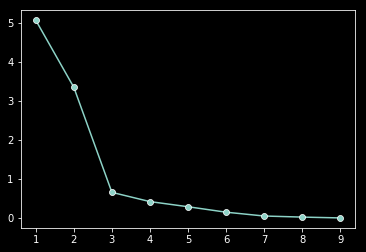

In [0]:
x_ax = np.arange(1, 10)
y_ax = pca_sc.explained_variance_
sns.lineplot(x = x_ax, y = y_ax, marker="o")

[0.50624198 0.84069111 0.90639603 0.94841868 0.97729898 0.99223311
 0.9973722  0.99973683 1.        ]


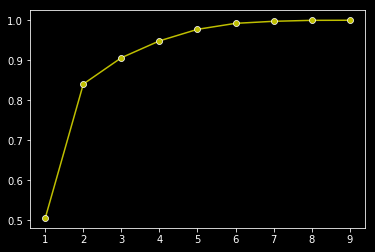

In [0]:
cumulative_var = np.cumsum(pca_sc.explained_variance_ratio_)
print(cumulative_var)

sns.lineplot(x = x_ax, y = cumulative_var, marker="o", color = "y");

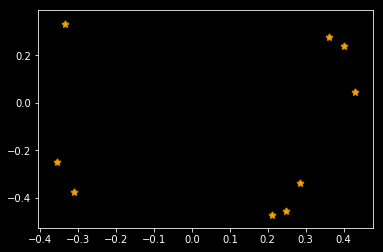

In [0]:
# Biplot for 2 PC
plt.scatter(x = pca_table["PC1"], y = pca_table["PC2"], c="yellow", marker="*", alpha=0.8, linewidths="2", edgecolors="orange")

In [0]:
pca_table.loc[:,["PC1", "PC2"]]

,PC1,PC2
0,0.285249,-0.337297
1,0.247367,-0.456546
2,-0.356299,-0.250570
3,-0.335515,0.334555
4,0.212124,-0.474631
5,0.361341,0.277761
6,0.401078,0.240629
7,-0.311440,-0.375216
8,0.429536,0.044383


In this case, we used PC1 and PC2 for easy interpretation. Since we could not find how to plot brand a, b, c and other brands (this is our lacking skill in deep understanding of mathematics). So we approximated them from preceptual map of R programming in the books.

この場合、簡単に解釈するために、PC1とPC2を利用されます．私のせいで、ブランドたちのグラフを描くことができない。残念だけど、僕たちの目的はモデルの結果をビジネス的解釈するので、教科書に従って、そのままに、できるだけ教科書の通りにします。

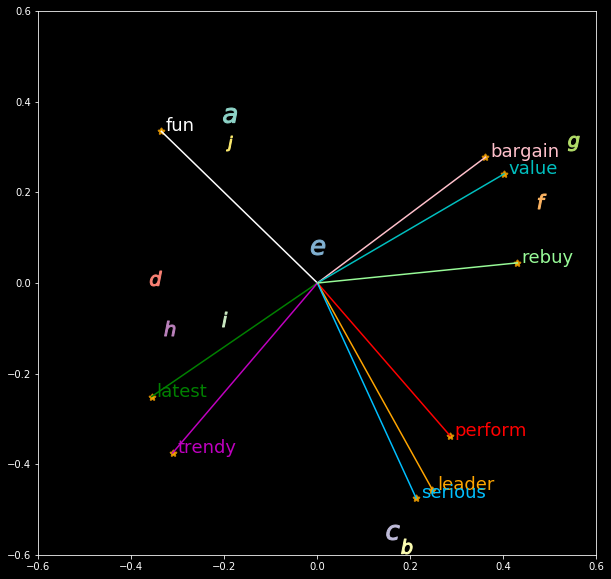

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.6, 0.6, -0.6, 0.6])
plt.scatter(x = pca_table["PC1"], y = pca_table["PC2"], c="yellow",
            marker="*", alpha=0.8, linewidths="2", edgecolors="orange")

features = "perform	leader	latest	fun	serious	bargain	value	trendy	rebuy".split()
col = ["red", "orange", "g", "w", "deepskyblue", "pink", "c", "m", "palegreen"]

ax.plot([-0.19],[ 0.37], marker="$ a $",lw=0, markersize=15)
ax.plot([ 0.19],[-0.58], marker="$ b $",lw=0, markersize=15)
ax.plot([ 0.16],[-0.55], marker="$ c $",lw=0, markersize=15)
ax.plot([-0.35],[ 0.01], marker="$ d $",lw=0, markersize=15)
ax.plot([ 0.00],[ 0.08], marker="$ e $",lw=0, markersize=15)
ax.plot([ 0.48],[ 0.18], marker="$ f $",lw=0, markersize=15)
ax.plot([ 0.55],[ 0.31], marker="$ g $",lw=0, markersize=15)
ax.plot([-0.32],[-0.10], marker="$ h $",lw=0, markersize=15)
ax.plot([-0.20],[-0.08], marker="$ i $",lw=0, markersize=15)
ax.plot([-0.19],[ 0.31], marker="$ j $",lw=0, markersize=15)

for (x, y, c, f) in zip(PC1 , PC2, col, features):
    plt.plot([0., x], [0., y], color = c)
    ax.annotate(f, (x+0.01, y), color = c, size = 18)
    
plt.show()

Yellow stars stand for arrow head

### Business interpretation of brands:

- "a" and "j" are near fun, they tend to be a good for kid or funny event like cosplay event and halloween event.
- "g" and "f" are likely to be a reasonable price with acceptable quality of item and it would valuable to rebuy.
- "e" is a general one, "e" would be a brand that no any uniqueness.
- "c" and "b" would be a brands for professional customer like CEO, Head of department and so on. For instance, if we are dealing with costume, the goods could be formal clothes such as suit costume.


### Business interpretation of features:

- It make sense to interpret "fun" is too different with "serious" and "leader". As you can see, they are inverse direction.
- "lastest" and "trendy" would be any hot item for high society (Hi-so in Thai language) and theirs price are high but not necessary and reasonable in a common sense. In contrast, "bargain", "value" and "rebuy" is more reasonable to buy. For instance, we can buy a previous model of mobile rather than a new one. Not fashionable but reasonable. Then, they are inverse direction.

!!!! If We are brand manager of "e", how can we move our goods to be an unique item ?

---------------------------------------------------------------------------------------
 
黄色スターは矢印のマークというものにします。

### ブランドでビジネス的に解釈：
- "a" と "j" にはもとも近くて、子供向けでしょう。そのおかげで、ハロウィーンパーティーやコスプレイベントには相応しいでしょう。
- "g" と "f" には許容品質です。適正価格で何かあったらもう一度かわなくてもいいでしょう。
- "e" の方は他と違いです。自分の目立つことがない。
- "c" と "b" はCEOとか社長にむけでしょう。それに、特別なイベントに参加したい顧客に向けでしょう。例にはスーツでしょう。

### 特徴たちでビジネス的に解釈：
- 面白いことが真剣なことと合わないので、グラフの方向が１８０角度ぐらいに違うのは一般でしょう。それに真剣なのはリーダ雰囲気を感じますね。
目には目を歯には歯をとみたいな感じです。
- 新しさと流行には贅沢な人に向けでしょう。常識によって価格が変でしょう。 "bargain"、"value"と"rebuy"に比べて大違いを感じられます。